In [1]:
# Packages / libraries
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

%matplotlib inline


# Increases the size of sns plots
sns.set(rc={'figure.figsize':(12,10)})

In [2]:
data = pd.read_csv('data_senseofagency.csv')
data

,Variable,VPN,Sex,Age,IQ,Intentionality_bias,grandiose_percentiles,vulnerable_percentiles,score_NA_TS,score_NA_HS,...,fre_Ketamine,fre_cocaine,baselineaction,agencyaction,baselinehearing,agencyhearing,diff_base_agencyaction,diff_base_agencyhearing,diff_binding,filter_$
0,Label,participants,NaN,NaN,NaN,Intentionality Bias,Classic Narcisstic Self(Klassiert),Threatened Self(Klassiert),Threatened Self,Hipochondriac Self,...,Frequency,Frequency,NaN,NaN,NaN,NaN,NaN,NaN,sense of agency,more_than_cannabis = 2 (FILTER)
1,NaN,1,1.0,1.0,1.0,1,1,1,1,1,...,0,0,-106.67,-213.33,-128.00,-176.67,106.66,48.67,57.99,0
2,NaN,2,2.0,23.0,119.0,0.5,1,2,11,8,...,0,0,-128.00,-170.67,-106.67,-219.33,42.67,112.66,-69.99,0
3,NaN,3,2.0,22.0,126.0,0.42,3,2,13,10,...,0,0,-85.33,-128.00,-106.67,-48.67,42.67,-58.00,100.67,0
4,NaN,4,1.0,24.0,111.0,0.67,3,2,11,6,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,NaN,227,2.0,31.0,NaN,0.67,2,2,12,8,...,1,3,53.57,31.89,-58.01,20.35,21.68,-78.36,100.05,1
207,NaN,228,2.0,22.0,NaN,0.46,2,3,15,9,...,1,1,21.63,2.61,17.74,-34.48,19.02,52.22,-33.2,0
208,NaN,229,1.0,27.0,121.0,0.29,1,1,8,5,...,0,0,-5.01,-320.92,-66.47,-152.55,315.90,86.08,229.82,0
209,NaN,230,1.0,30.0,NaN,0.96,1,4,17,4,...,2,3,-28.97,-9.71,-17.49,9.20,-19.27,-26.69,7.43,1


In [3]:
data = data.drop(0)
data

,Variable,VPN,Sex,Age,IQ,Intentionality_bias,grandiose_percentiles,vulnerable_percentiles,score_NA_TS,score_NA_HS,...,fre_Ketamine,fre_cocaine,baselineaction,agencyaction,baselinehearing,agencyhearing,diff_base_agencyaction,diff_base_agencyhearing,diff_binding,filter_$
1,NaN,1,1.0,1.0,1.0,1,1,1,1,1,...,0,0,-106.67,-213.33,-128.00,-176.67,106.66,48.67,57.99,0
2,NaN,2,2.0,23.0,119.0,0.5,1,2,11,8,...,0,0,-128.00,-170.67,-106.67,-219.33,42.67,112.66,-69.99,0
3,NaN,3,2.0,22.0,126.0,0.42,3,2,13,10,...,0,0,-85.33,-128.00,-106.67,-48.67,42.67,-58.00,100.67,0
4,NaN,4,1.0,24.0,111.0,0.67,3,2,11,6,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,NaN,6,2.0,26.0,116.0,0.67,1,1,7,5,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,NaN,227,2.0,31.0,NaN,0.67,2,2,12,8,...,1,3,53.57,31.89,-58.01,20.35,21.68,-78.36,100.05,1
207,NaN,228,2.0,22.0,NaN,0.46,2,3,15,9,...,1,1,21.63,2.61,17.74,-34.48,19.02,52.22,-33.2,0
208,NaN,229,1.0,27.0,121.0,0.29,1,1,8,5,...,0,0,-5.01,-320.92,-66.47,-152.55,315.90,86.08,229.82,0
209,NaN,230,1.0,30.0,NaN,0.96,1,4,17,4,...,2,3,-28.97,-9.71,-17.49,9.20,-19.27,-26.69,7.43,1


In [4]:
data.columns

Index(['Variable', 'VPN', 'Sex', 'Age', 'IQ', 'Intentionality_bias',
       'grandiose_percentiles', 'vulnerable_percentiles', 'score_NA_TS',
       'score_NA_HS', 'score_NA_CS', 'score_NA_IS', 'score_NA', 'score_FW_FW',
       'score_FW_SD', 'score_FW_FD', 'score_FW_U', 'freewill_percentiles',
       'Cannabis', 'Amphetamin', 'Ecstasy', 'LSD', 'mushrooms', 'Ketamine',
       'cocaine', 'more_than_cannabis', 'fre_alcohol', 'fre_smoking',
       'fre_tranquilizers', 'fre_psychotrops', 'fre_Cannabis',
       'fre_Amphetamin', 'fre_Ecstasy', 'fre_LSD', 'fre_mushrooms',
       'fre_Ketamine', 'fre_cocaine', 'baselineaction', 'agencyaction',
       'baselinehearing', 'agencyhearing', 'diff_base_agencyaction',
       'diff_base_agencyhearing', 'diff_binding', 'filter_$'],
      dtype='object')

In [5]:
data = data[['VPN', 'Sex', 'Age', 'IQ', 'Intentionality_bias','score_NA', 'score_FW_FW','score_FW_U', 'Cannabis', 
             'Amphetamin', 'Ecstasy', 'LSD', 'mushrooms', 'Ketamine','cocaine', 'more_than_cannabis', 'fre_alcohol',
             'fre_tranquilizers', 'fre_psychotrops', 'fre_Cannabis','fre_Amphetamin', 'fre_Ecstasy', 
             'fre_LSD', 'fre_mushrooms','fre_Ketamine', 'fre_cocaine', 'diff_binding', 'filter_$']]
data

,VPN,Sex,Age,IQ,Intentionality_bias,score_NA,score_FW_FW,score_FW_U,Cannabis,Amphetamin,...,fre_psychotrops,fre_Cannabis,fre_Amphetamin,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_Ketamine,fre_cocaine,diff_binding,filter_$
1,1,1.0,1.0,1.0,1,46,27,23,2,1,...,0.0,1,0,0,0,0,0,0,57.99,0
2,2,2.0,23.0,119.0,0.5,35,27,27,1,1,...,0.0,0,0,0,0,0,0,0,-69.99,0
3,3,2.0,22.0,126.0,0.42,53,23,16,1,1,...,0.0,0,0,0,0,0,0,0,100.67,0
4,4,1.0,24.0,111.0,0.67,46,24,18,2,1,...,0.0,1,0,0,0,0,0,0,NaN,0
5,6,2.0,26.0,116.0,0.67,32,30,21,1,1,...,0.0,0,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,227,2.0,31.0,NaN,0.67,50,23,32,2,2,...,2.0,6,6,2,1,1,1,3,100.05,1
207,228,2.0,22.0,NaN,0.46,57,26,33,2,1,...,1.0,3,1,1,1,1,1,1,-33.2,0
208,229,1.0,27.0,121.0,0.29,31,25,20,1,1,...,1.0,0,0,0,0,0,0,0,229.82,0
209,230,1.0,30.0,NaN,0.96,48,24,26,2,2,...,1.0,9,3,3,2,2,2,3,7.43,1


In [6]:
data1 = data.rename(columns ={'VPN':'Participant',
                             'score_NA':'Narcissism',
                             'score_FW_FW':'Free_will',
                             'score_FW_U':'Unpredictability',
                             'Amphetamin':'Amphetamine',
                             'mushrooms':'Mushrooms',
                             'cocaine':'Cocaine',
                             'fre_Cannabis':'fre_cannabis',
                             'fre_psychotrops':'fre_psychotropics',
                             'fre_Amphetamin':'fre_amphetamine',
                             'fre_Ectsasy':'fre_ecstasy',
                             'fre_Ketamine':'fre_ketamine',
                             'diff_binding':'Sense_of_agency',
                             'filter_$':'more_than_cannabis=2'
                             })
data1

,Participant,Sex,Age,IQ,Intentionality_bias,Narcissism,Free_will,Unpredictability,Cannabis,Amphetamine,...,fre_psychotropics,fre_cannabis,fre_amphetamine,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_ketamine,fre_cocaine,Sense_of_agency,more_than_cannabis=2
1,1,1.0,1.0,1.0,1,46,27,23,2,1,...,0.0,1,0,0,0,0,0,0,57.99,0
2,2,2.0,23.0,119.0,0.5,35,27,27,1,1,...,0.0,0,0,0,0,0,0,0,-69.99,0
3,3,2.0,22.0,126.0,0.42,53,23,16,1,1,...,0.0,0,0,0,0,0,0,0,100.67,0
4,4,1.0,24.0,111.0,0.67,46,24,18,2,1,...,0.0,1,0,0,0,0,0,0,NaN,0
5,6,2.0,26.0,116.0,0.67,32,30,21,1,1,...,0.0,0,0,0,0,0,0,0,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206,227,2.0,31.0,NaN,0.67,50,23,32,2,2,...,2.0,6,6,2,1,1,1,3,100.05,1
207,228,2.0,22.0,NaN,0.46,57,26,33,2,1,...,1.0,3,1,1,1,1,1,1,-33.2,0
208,229,1.0,27.0,121.0,0.29,31,25,20,1,1,...,1.0,0,0,0,0,0,0,0,229.82,0
209,230,1.0,30.0,NaN,0.96,48,24,26,2,2,...,1.0,9,3,3,2,2,2,3,7.43,1


In [7]:
data1.columns

Index(['Participant', 'Sex', 'Age', 'IQ', 'Intentionality_bias', 'Narcissism',
       'Free_will', 'Unpredictability', 'Cannabis', 'Amphetamine', 'Ecstasy',
       'LSD', 'Mushrooms', 'Ketamine', 'Cocaine', 'more_than_cannabis',
       'fre_alcohol', 'fre_tranquilizers', 'fre_psychotropics', 'fre_cannabis',
       'fre_amphetamine', 'fre_Ecstasy', 'fre_LSD', 'fre_mushrooms',
       'fre_ketamine', 'fre_cocaine', 'Sense_of_agency',
       'more_than_cannabis=2'],
      dtype='object')

In [8]:
data1.isnull().sum()

Participant              0
Sex                      0
Age                      0
IQ                      11
Intentionality_bias      3
Narcissism               1
Free_will                1
Unpredictability         1
Cannabis                 1
Amphetamine              1
Ecstasy                  1
LSD                      1
Mushrooms                1
Ketamine                 1
Cocaine                  1
more_than_cannabis       0
fre_alcohol              1
fre_tranquilizers        1
fre_psychotropics        1
fre_cannabis             1
fre_amphetamine          1
fre_Ecstasy              1
fre_LSD                  1
fre_mushrooms            1
fre_ketamine             1
fre_cocaine              1
Sense_of_agency          8
more_than_cannabis=2     0
dtype: int64

In [9]:
data1 = data1.dropna()
data1

,Participant,Sex,Age,IQ,Intentionality_bias,Narcissism,Free_will,Unpredictability,Cannabis,Amphetamine,...,fre_psychotropics,fre_cannabis,fre_amphetamine,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_ketamine,fre_cocaine,Sense_of_agency,more_than_cannabis=2
1,1,1.0,1.0,1.0,1,46,27,23,2,1,...,0.0,1,0,0,0,0,0,0,57.99,0
2,2,2.0,23.0,119.0,0.5,35,27,27,1,1,...,0.0,0,0,0,0,0,0,0,-69.99,0
3,3,2.0,22.0,126.0,0.42,53,23,16,1,1,...,0.0,0,0,0,0,0,0,0,100.67,0
7,8,2.0,21.0,122.5,0.75,37,22,26,1,1,...,0.0,0,0,0,0,0,0,0,399.34,0
8,9,2.0,22.0,94.0,0.5,31,25,29,2,1,...,0.0,1,0,0,0,0,0,0,100.66,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,223,2.0,27.0,103.0,0.71,47,15,18,2,2,...,3.0,5,5,5,3,2,5,4,117.5,1
203,224,2.0,27.0,118.0,0.96,59,19,25,1,1,...,2.0,2,3,2,1,1,1,1,55.88,0
204,225,2.0,31.0,110.5,0.63,50,22,22,2,2,...,0.0,6,1,1,3,1,1,1,40.51,1
205,226,1.0,29.0,107.5,0.42,38,21,30,2,2,...,1.0,9,4,4,2,2,2,3,77.91,1


In [10]:
data = data1.to_csv('substance_use', index=False)
data = pd.read_csv('substance_use')

<Axes: >

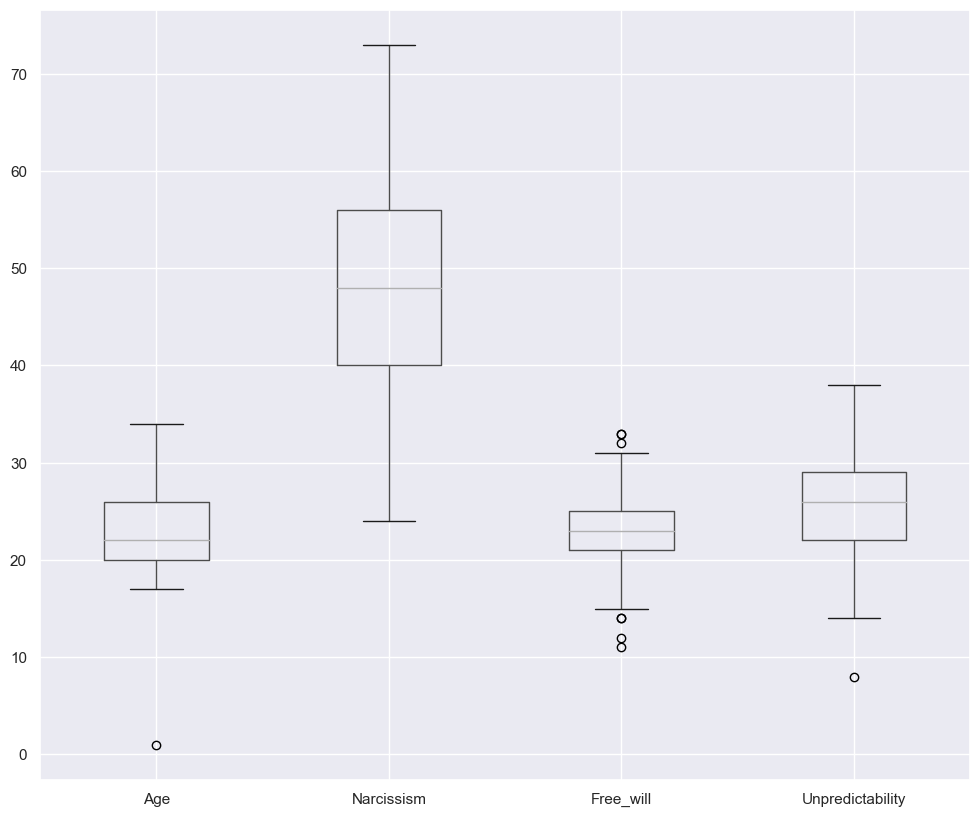

In [11]:
data.boxplot(column=['Age','Narcissism','Free_will','Unpredictability'])

<Axes: >

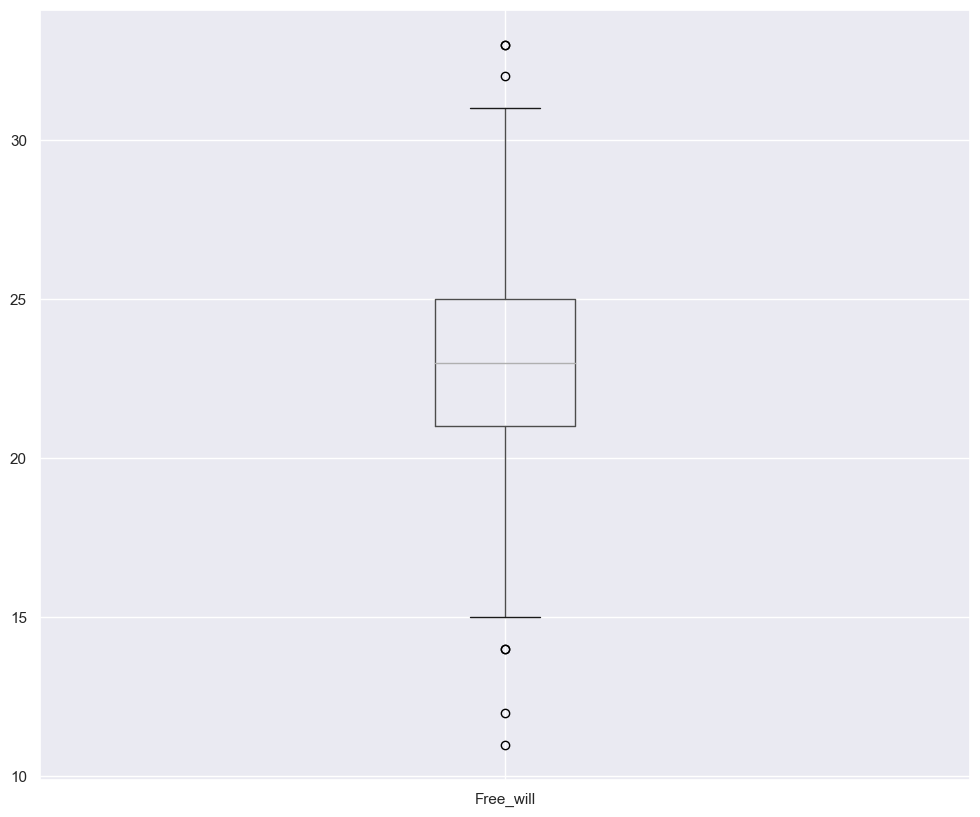

In [12]:
data.boxplot(column=['Free_will'])

<Axes: >

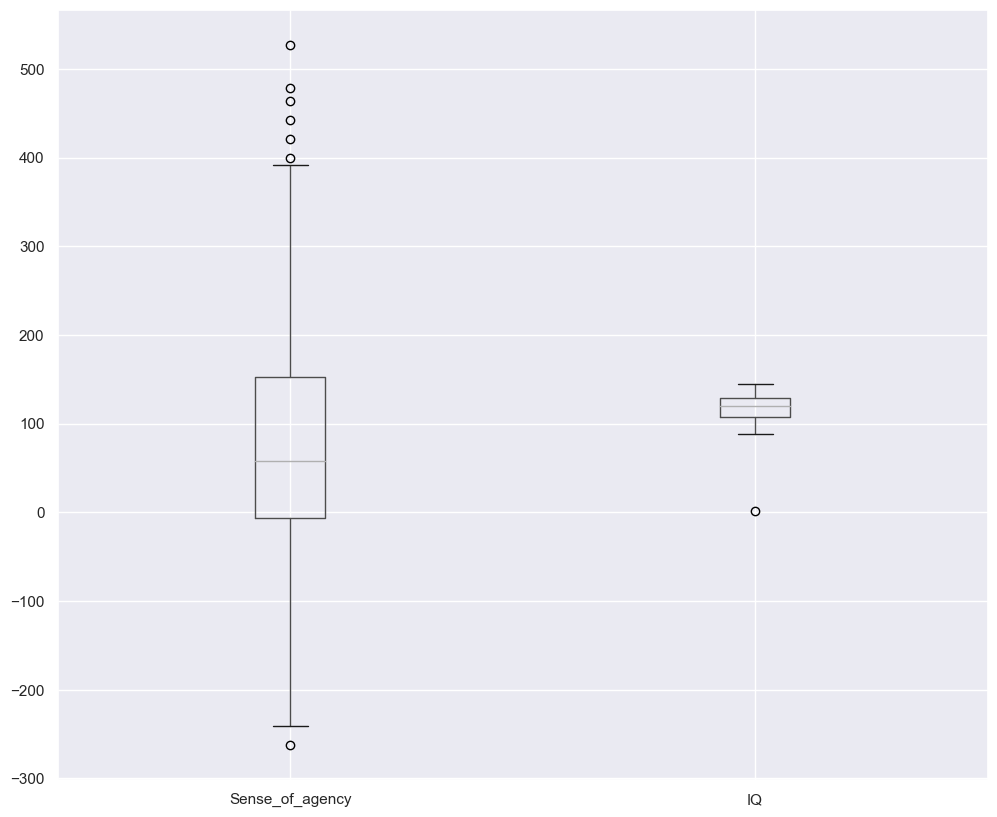

In [13]:
data.boxplot(column=['Sense_of_agency','IQ'])

<Axes: >

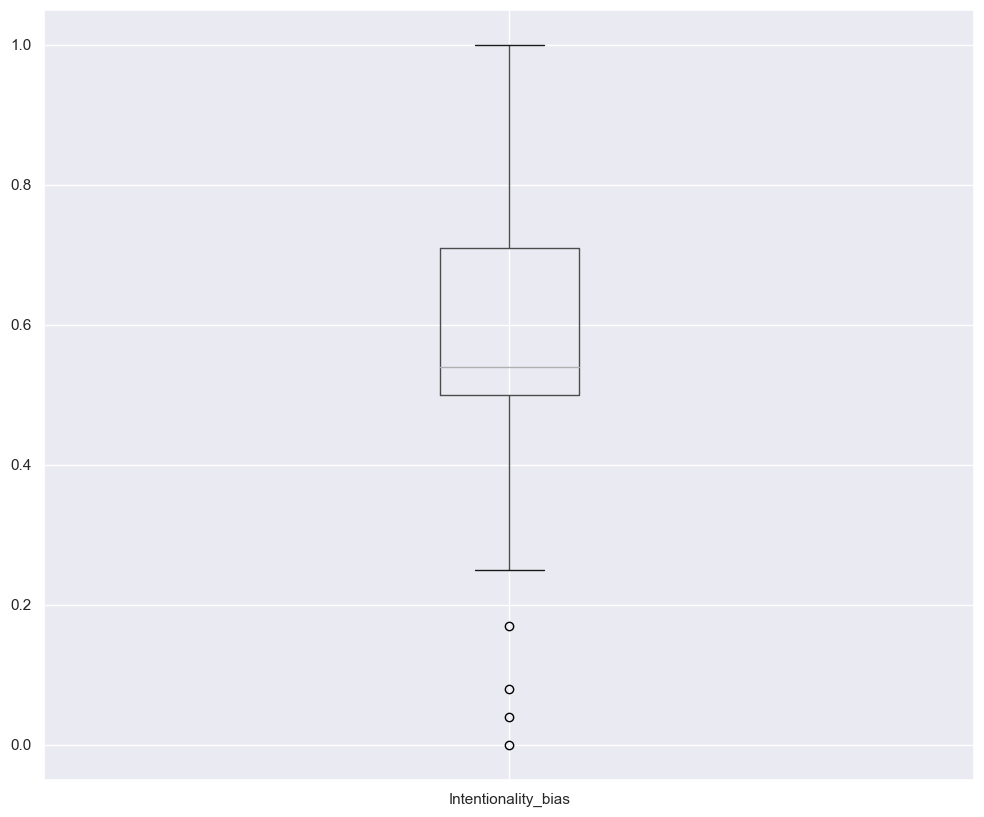

In [14]:
data.boxplot(column=['Intentionality_bias'])

In [15]:
data1 = data[(data['Age'] > 10) & 
             (data['Unpredictability'] > 10) & 
             (data['Intentionality_bias'] > 0.2) & 
             (data['Free_will'].between(15, 31)) & 
             (data['Sense_of_agency'].between(-240, 345)) &
             (data['IQ']>1)]
data1

,Participant,Sex,Age,IQ,Intentionality_bias,Narcissism,Free_will,Unpredictability,Cannabis,Amphetamine,...,fre_psychotropics,fre_cannabis,fre_amphetamine,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_ketamine,fre_cocaine,Sense_of_agency,more_than_cannabis=2
1,2,2.0,23.0,119.0,0.50,35,27,27,1,1,...,0.0,0,0,0,0,0,0,0,-69.99,0
2,3,2.0,22.0,126.0,0.42,53,23,16,1,1,...,0.0,0,0,0,0,0,0,0,100.67,0
4,9,2.0,22.0,94.0,0.50,31,25,29,2,1,...,0.0,1,0,0,0,0,0,0,100.66,1
5,10,2.0,21.0,142.0,0.54,47,24,19,1,1,...,0.0,0,0,0,0,0,0,0,-27.34,0
6,11,1.0,24.0,119.5,0.50,43,29,28,2,1,...,0.0,0,0,0,0,0,0,0,-27.34,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,223,2.0,27.0,103.0,0.71,47,15,18,2,2,...,3.0,5,5,5,3,2,5,4,117.50,1
185,224,2.0,27.0,118.0,0.96,59,19,25,1,1,...,2.0,2,3,2,1,1,1,1,55.88,0
186,225,2.0,31.0,110.5,0.63,50,22,22,2,2,...,0.0,6,1,1,3,1,1,1,40.51,1
187,226,1.0,29.0,107.5,0.42,38,21,30,2,2,...,1.0,9,4,4,2,2,2,3,77.91,1


<Axes: >

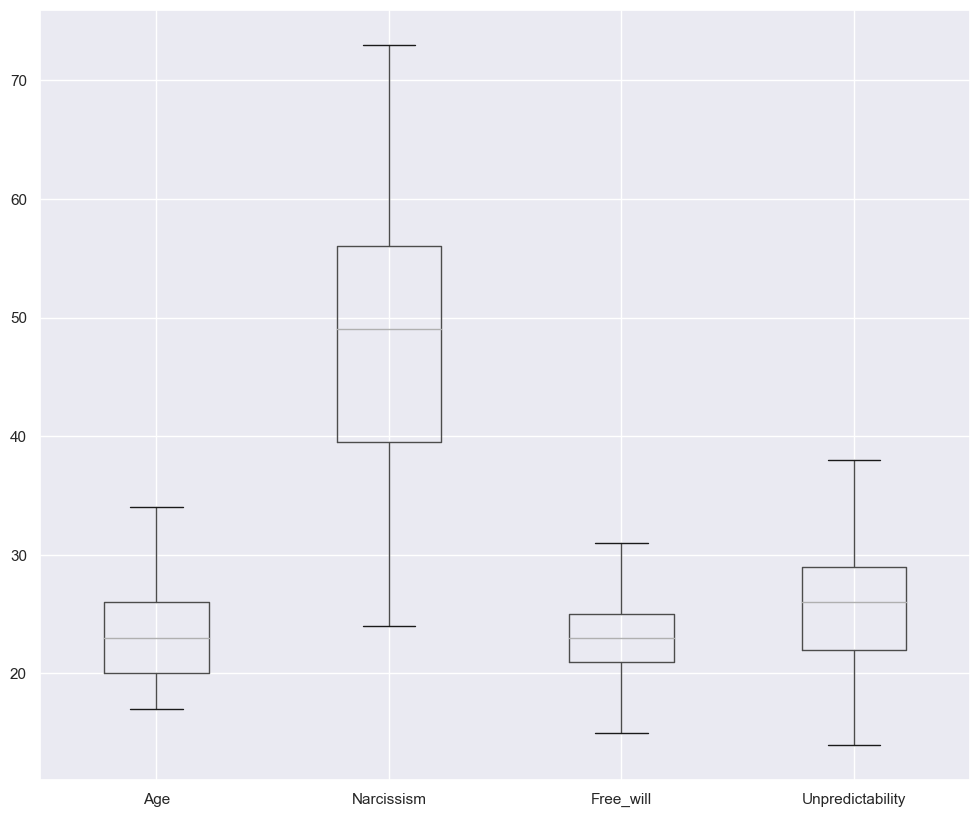

In [16]:
data1.boxplot(column=['Age','Narcissism','Free_will','Unpredictability'])

<Axes: >

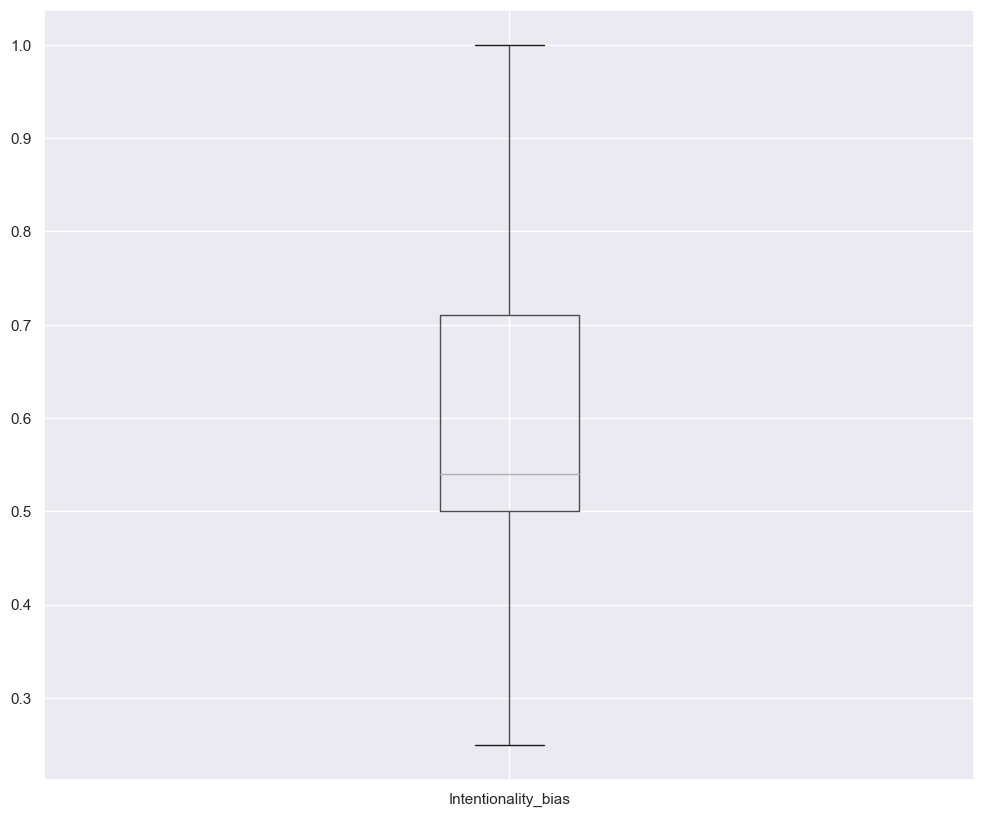

In [17]:
data1.boxplot(column=['Intentionality_bias'])

<Axes: >

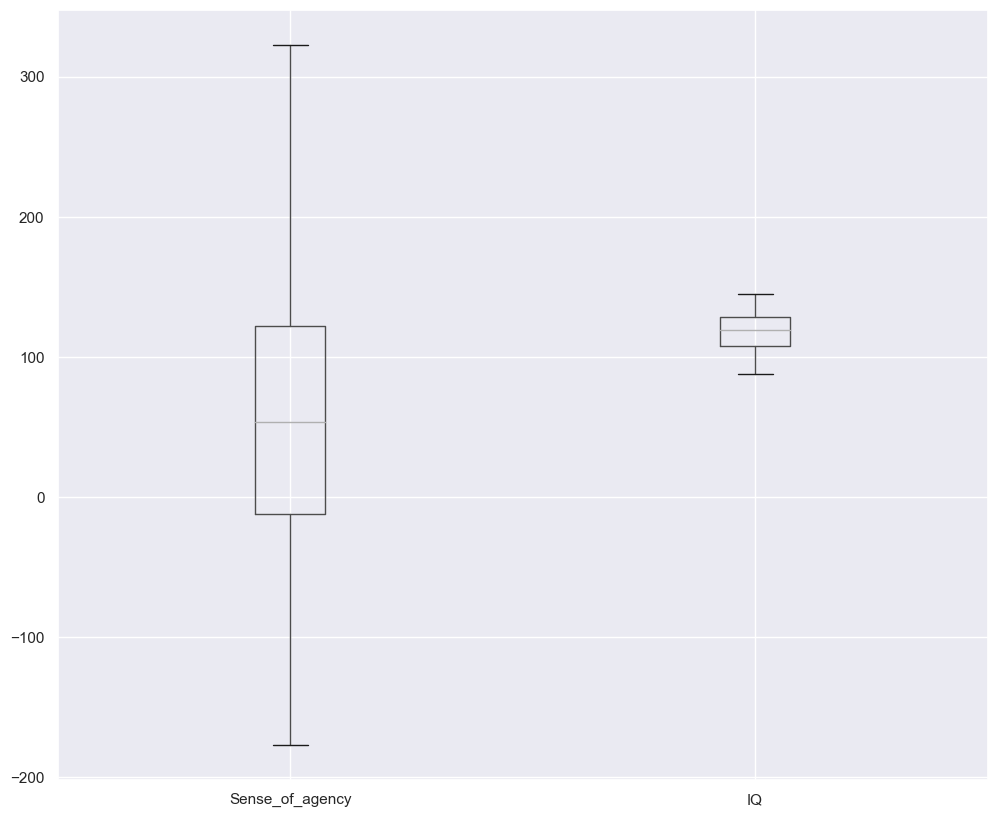

In [18]:
data1.boxplot(column=['Sense_of_agency','IQ'])

In [19]:
df = data1.reindex(columns=['Participant', 'Sex', 'Age', 'IQ','Sense_of_agency','Intentionality_bias','Free_will', 'Unpredictability','Narcissism','Cannabis', 'Amphetamine', 'Ecstasy',
       'LSD', 'Mushrooms', 'Ketamine', 'Cocaine', 'more_than_cannabis','more_than_cannabis=2','fre_alcohol', 'fre_tranquilizers', 'fre_psychotropics',
       'fre_cannabis', 'fre_amphetamine', 'fre_Ecstasy', 'fre_LSD',
       'fre_mushrooms', 'fre_ketamine', 'fre_cocaine'])
df

,Participant,Sex,Age,IQ,Sense_of_agency,Intentionality_bias,Free_will,Unpredictability,Narcissism,Cannabis,...,fre_alcohol,fre_tranquilizers,fre_psychotropics,fre_cannabis,fre_amphetamine,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_ketamine,fre_cocaine
1,2,2.0,23.0,119.0,-69.99,0.50,27,27,35,1,...,4.0,0.0,0.0,0,0,0,0,0,0,0
2,3,2.0,22.0,126.0,100.67,0.42,23,16,53,1,...,3.0,0.0,0.0,0,0,0,0,0,0,0
4,9,2.0,22.0,94.0,100.66,0.50,25,29,31,2,...,4.0,0.0,0.0,1,0,0,0,0,0,0
5,10,2.0,21.0,142.0,-27.34,0.54,24,19,47,1,...,3.0,0.0,0.0,0,0,0,0,0,0,0
6,11,1.0,24.0,119.5,-27.34,0.50,29,28,43,2,...,5.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,223,2.0,27.0,103.0,117.50,0.71,15,18,47,2,...,5.0,3.0,3.0,5,5,5,3,2,5,4
185,224,2.0,27.0,118.0,55.88,0.96,19,25,59,1,...,4.0,1.0,2.0,2,3,2,1,1,1,1
186,225,2.0,31.0,110.5,40.51,0.63,22,22,50,2,...,3.0,0.0,0.0,6,1,1,3,1,1,1
187,226,1.0,29.0,107.5,77.91,0.42,21,30,38,2,...,6.0,1.0,1.0,9,4,4,2,2,2,3


In [20]:
data = df.to_csv('drug_and_personality.csv', index=False)

In [21]:
data = pd.read_csv('drug_and_personality.csv')
data

,Participant,Sex,Age,IQ,Sense_of_agency,Intentionality_bias,Free_will,Unpredictability,Narcissism,Cannabis,...,fre_alcohol,fre_tranquilizers,fre_psychotropics,fre_cannabis,fre_amphetamine,fre_Ecstasy,fre_LSD,fre_mushrooms,fre_ketamine,fre_cocaine
0,2,2.0,23.0,119.0,-69.99,0.50,27,27,35,1,...,4.0,0.0,0.0,0,0,0,0,0,0,0
1,3,2.0,22.0,126.0,100.67,0.42,23,16,53,1,...,3.0,0.0,0.0,0,0,0,0,0,0,0
2,9,2.0,22.0,94.0,100.66,0.50,25,29,31,2,...,4.0,0.0,0.0,1,0,0,0,0,0,0
3,10,2.0,21.0,142.0,-27.34,0.54,24,19,47,1,...,3.0,0.0,0.0,0,0,0,0,0,0,0
4,11,1.0,24.0,119.5,-27.34,0.50,29,28,43,2,...,5.0,0.0,0.0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,223,2.0,27.0,103.0,117.50,0.71,15,18,47,2,...,5.0,3.0,3.0,5,5,5,3,2,5,4
163,224,2.0,27.0,118.0,55.88,0.96,19,25,59,1,...,4.0,1.0,2.0,2,3,2,1,1,1,1
164,225,2.0,31.0,110.5,40.51,0.63,22,22,50,2,...,3.0,0.0,0.0,6,1,1,3,1,1,1
165,226,1.0,29.0,107.5,77.91,0.42,21,30,38,2,...,6.0,1.0,1.0,9,4,4,2,2,2,3


In [22]:
data.isnull().sum()

Participant             0
Sex                     0
Age                     0
IQ                      0
Sense_of_agency         0
Intentionality_bias     0
Free_will               0
Unpredictability        0
Narcissism              0
Cannabis                0
Amphetamine             0
Ecstasy                 0
LSD                     0
Mushrooms               0
Ketamine                0
Cocaine                 0
more_than_cannabis      0
more_than_cannabis=2    0
fre_alcohol             0
fre_tranquilizers       0
fre_psychotropics       0
fre_cannabis            0
fre_amphetamine         0
fre_Ecstasy             0
fre_LSD                 0
fre_mushrooms           0
fre_ketamine            0
fre_cocaine             0
dtype: int64

In [23]:
data[['Age', 'IQ', 'Sense_of_agency',
       'Intentionality_bias', 'Free_will', 'Unpredictability', 'Narcissism']].describe()

,Age,IQ,Sense_of_agency,Intentionality_bias,Free_will,Unpredictability,Narcissism
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,23.329341,118.553892,67.893772,0.611257,23.131737,25.754491,47.976048
std,3.571040,15.779450,107.383373,0.177089,3.452868,4.989709,10.206868
min,17.000000,88.000000,-176.660000,0.250000,15.000000,14.000000,24.000000
25%,20.000000,107.500000,-12.100000,0.500000,21.000000,22.000000,39.500000
50%,23.000000,119.500000,53.450000,0.540000,23.000000,26.000000,49.000000
75%,26.000000,128.500000,122.000000,0.710000,25.000000,29.000000,56.000000
max,34.000000,145.000000,322.780000,1.000000,31.000000,38.000000,73.000000


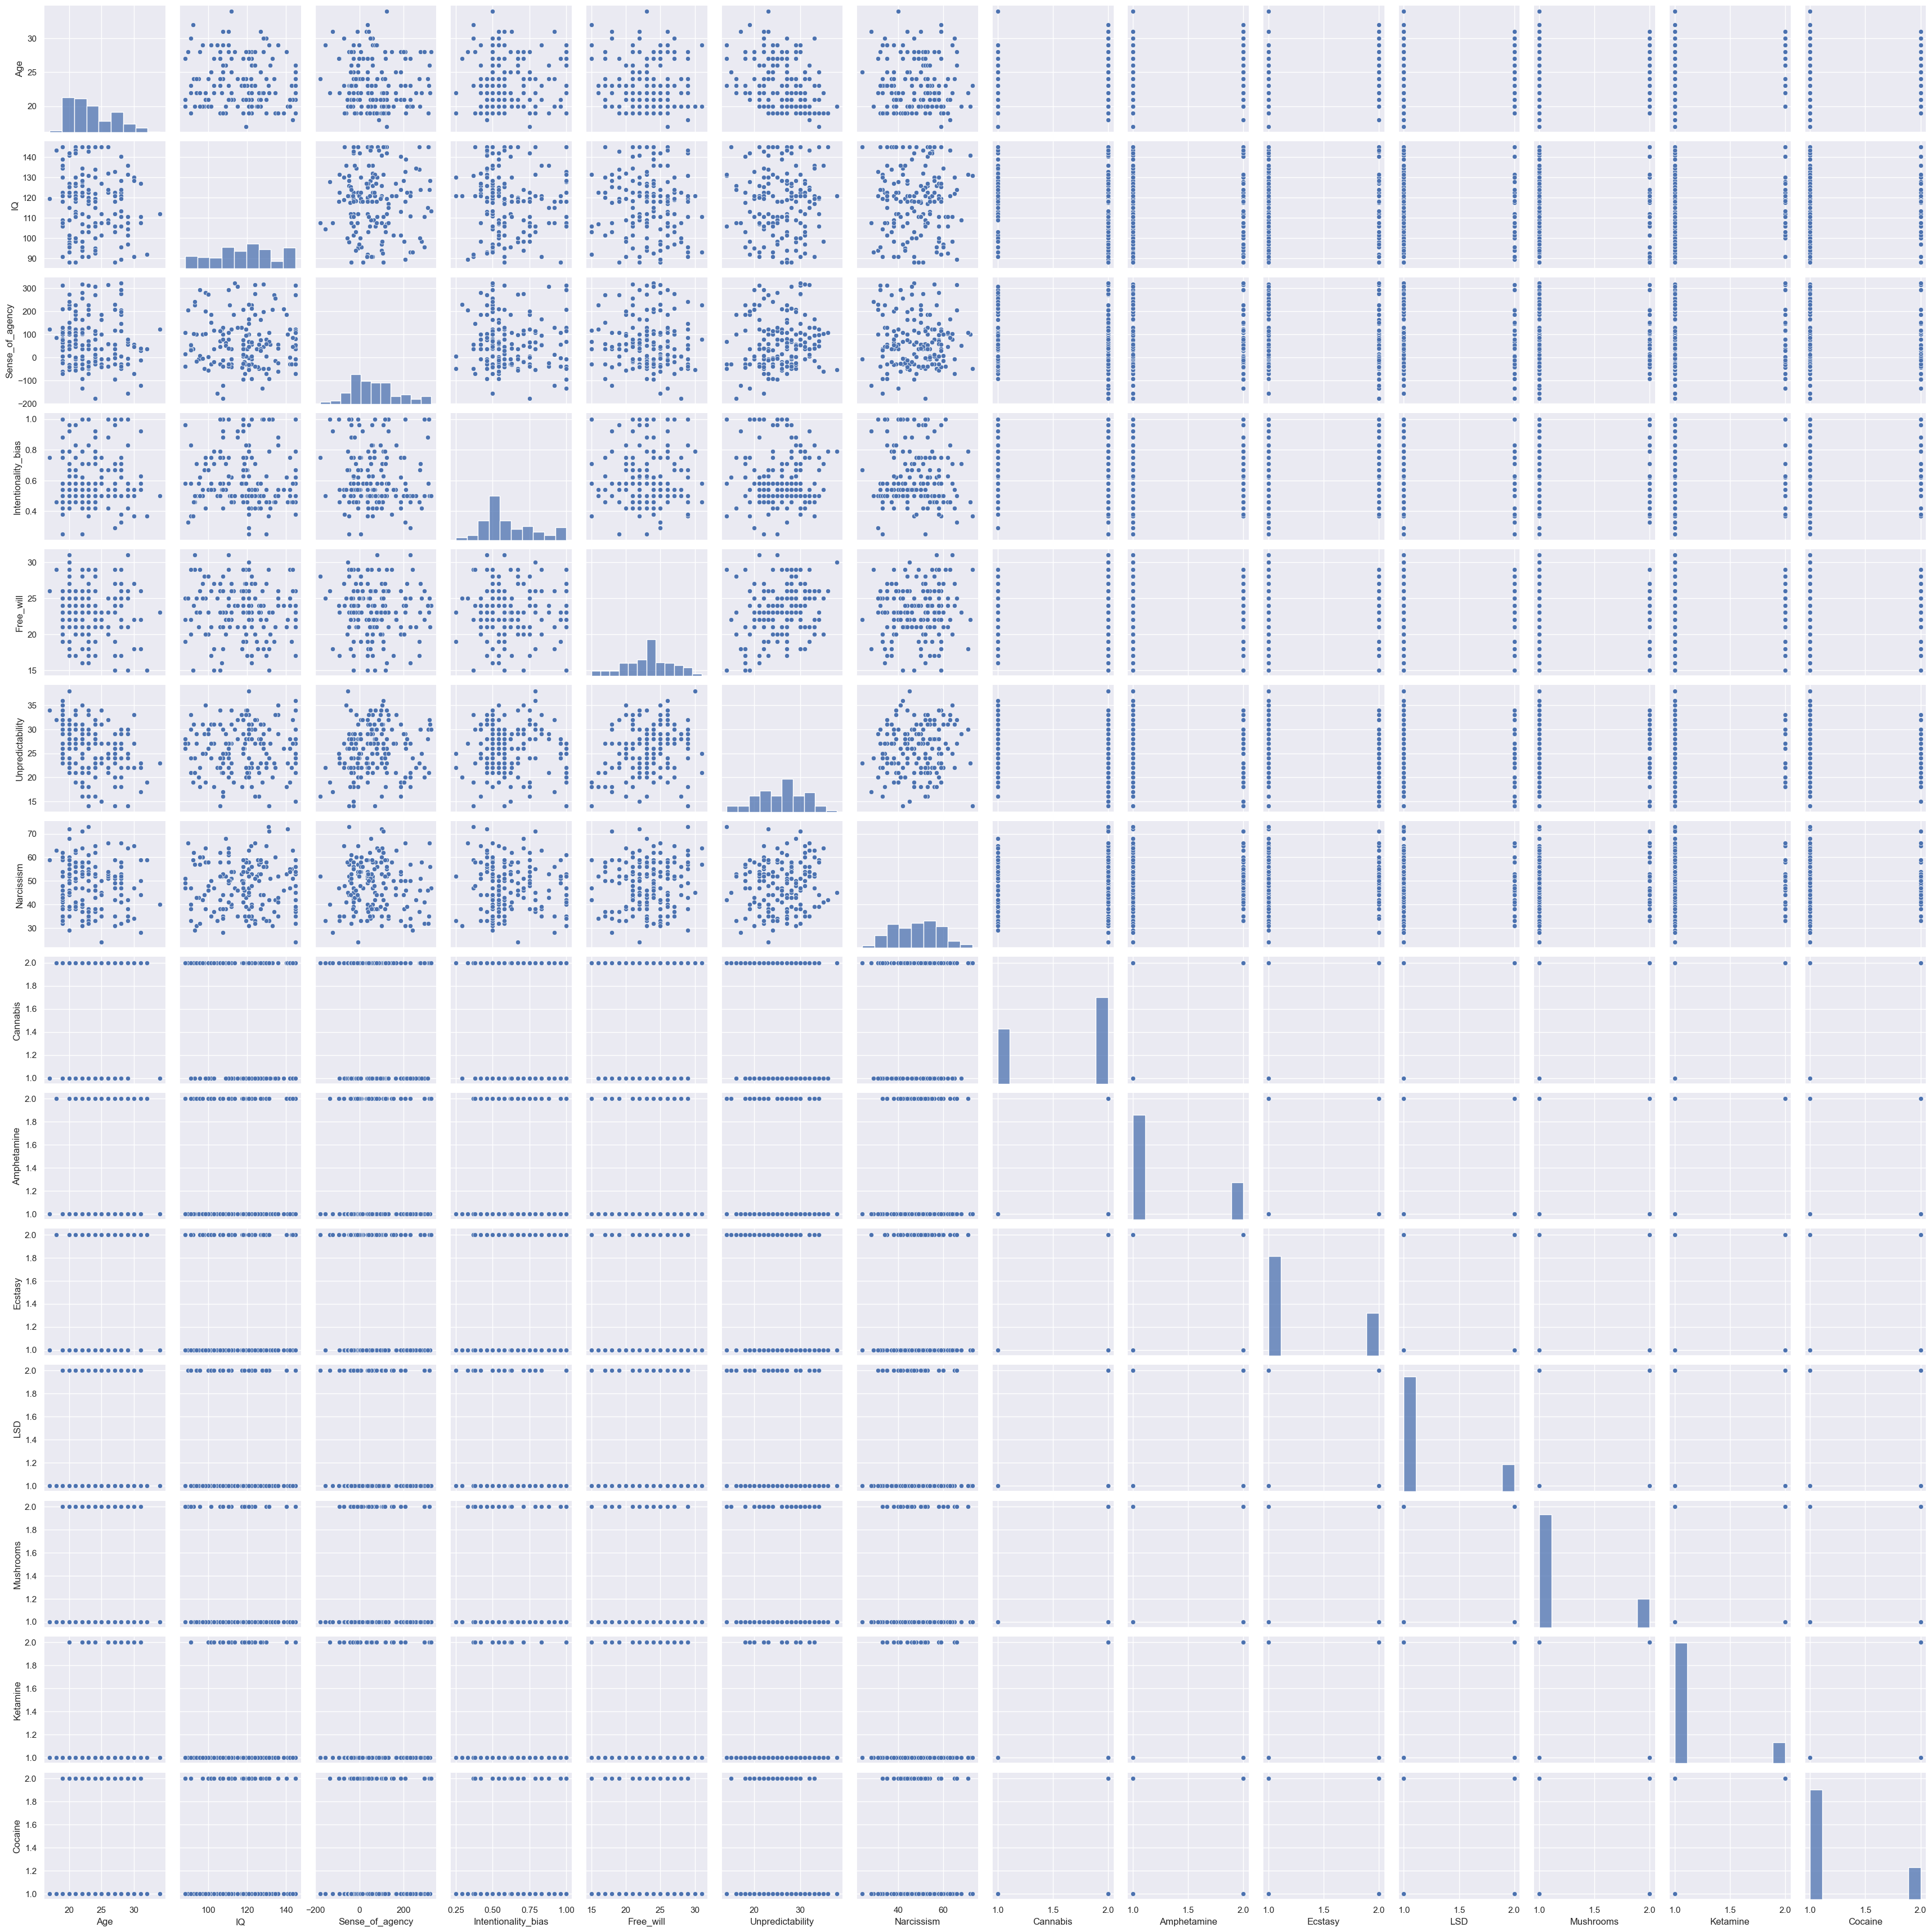

In [25]:
g = sns.pairplot(data[['Age', 'IQ', 'Sense_of_agency', 'Intentionality_bias', 'Free_will', 'Unpredictability', 
                       'Narcissism','Cannabis', 'Amphetamine', 'Ecstasy', 'LSD', 'Mushrooms', 'Ketamine','Cocaine']])

In [26]:
data.columns

Index(['Participant', 'Sex', 'Age', 'IQ', 'Sense_of_agency',
       'Intentionality_bias', 'Free_will', 'Unpredictability', 'Narcissism',
       'Cannabis', 'Amphetamine', 'Ecstasy', 'LSD', 'Mushrooms', 'Ketamine',
       'Cocaine', 'more_than_cannabis', 'more_than_cannabis=2', 'fre_alcohol',
       'fre_tranquilizers', 'fre_psychotropics', 'fre_cannabis',
       'fre_amphetamine', 'fre_Ecstasy', 'fre_LSD', 'fre_mushrooms',
       'fre_ketamine', 'fre_cocaine'],
      dtype='object')